In [3]:
%matplotlib inline

import pandas as pd
import numpy as np

def get_columns(depth):
    cols = []
    for c in df.columns.values:
        d = None
        try:
            d = int(c[-1])
        except:
            pass
        if not d or d == depth:
            cols.append(c)
    return cols

networks = pd.read_csv('networks/network_stats.csv', sep=';', index_col='test')
networks['log n'] = np.log(networks['n'])
networks['log max_deg'] = np.log(networks['max_deg'])
networks['log avg_deg'] = np.log(networks['avg_deg'])

/home/felix/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


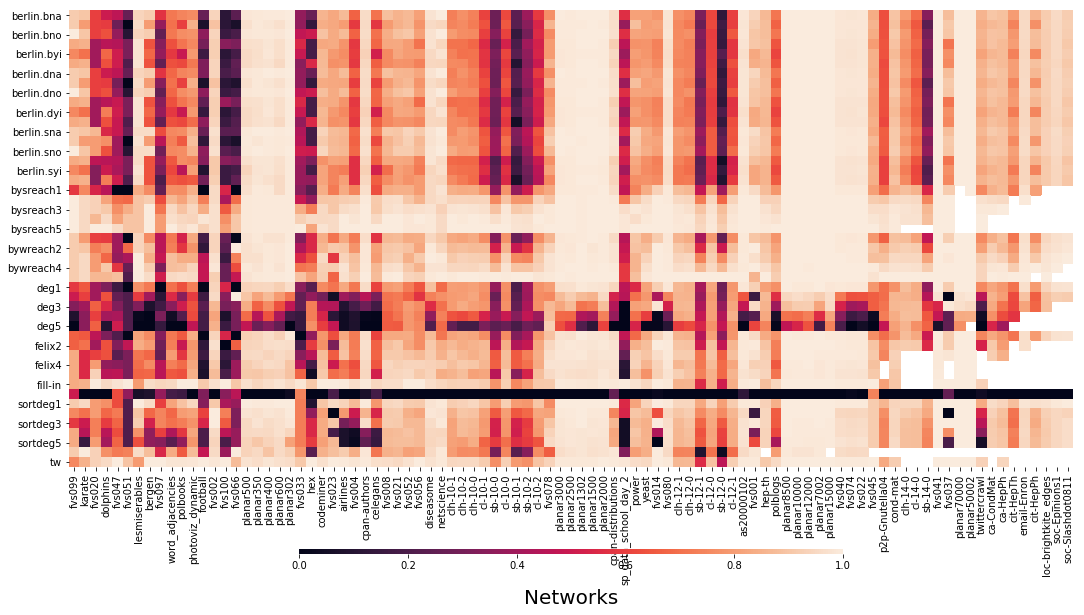

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

small = pd.read_csv('networks/small_rep.csv', index_col='test')
medium = pd.read_csv('networks/medium_rep.csv', index_col='test')
big = pd.read_csv('networks/big_rep.csv', index_col='test')
huge = pd.read_csv('networks/huge_rep.csv', index_col='test')

df = pd.concat([small, medium, big, huge])


df = df.join(networks['m']).sort_values('m').drop('m', 1)

# Select by radius
radius = 5
df = df[df['rad'] == radius]
df = df.drop('rad', 1).drop('christoph', 1)

# Normalize, 1 being BEST running time, 0 being the WORST
# MIN-MAX normalization
for c in df.index:
    row = df.loc[c]
    if row.min() == row.max():
        row = 1.0
    else:
        row = 1.0 - (row-row.min())/(row.max()-row.min())
    df.loc[c] = row
    
plt.figure(figsize=(18,10))
ax = sns.heatmap(df.T, cbar_kws={"orientation": "horizontal", "fraction": .01, "aspect": 100})
ax.patch.set_alpha(1)
# ax.get_xaxis().set_ticks([])
ax.set_xlabel('Networks', fontsize=20)

plt.savefig('heatmap_all_r{}.svg'.format(radius))

# Times?

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

small = pd.read_csv('networks/small_rep_with_times.csv', index_col='test', skipinitialspace=True)
medium = pd.read_csv('networks/medium_rep_with_times.csv', index_col='test', skipinitialspace=True)
big = pd.read_csv('networks/big_rep_with_times.csv', index_col='test', skipinitialspace=True)
huge = pd.read_csv('networks/huge_rep_with_times.csv', index_col='test', skipinitialspace=True)

df = pd.concat([small, medium, big, huge])
radius = 2 # Radius 1 does not exist here
tab = df[df['rad']==radius].drop('rad',1)
cols = [s for s in tab.columns.tolist() if s.endswith('time')]
tab = tab[cols]

for c in cols:
    tab[c] = tab[c].str.strip()
    tab[c] = tab[c].str.replace(".",":")
    tab[c] = pd.to_timedelta(tab[c], errors='coerce')
# tab = pd.to_timedelta(tab, errors='coerce')
tab

,sortdeg1_time,td_time,fill-in_time,berlin.sna_time,WReachR_time,SReachR_time,felixR_time
test,,,,,,,
bergen,00:00:02,00:00:10,00:00:00,00:00:00,00:00:00,00:00:00,00:00:15
dolphins,00:00:00,00:00:12,00:00:00,00:00:00,00:00:00,00:00:00,00:00:16
football,00:00:02,00:00:12,00:00:02,00:00:00,00:00:00,00:00:00,00:00:23
fvs002,00:00:02,00:00:27,00:00:00,00:00:00,00:00:01,00:00:00,00:00:16
fvs020,00:00:02,00:00:14,00:00:01,00:00:00,00:00:00,00:00:01,00:00:11
fvs033,00:00:01,00:04:21,00:00:20,00:00:00,00:00:01,00:00:03,00:00:16
fvs047,00:00:01,00:00:07,00:00:00,00:00:00,00:00:00,00:00:00,00:00:14
fvs051,00:00:02,00:00:06,00:00:01,00:00:01,00:00:00,00:00:00,00:00:16
fvs066,00:00:01,00:00:17,00:00:06,00:00:00,00:00:00,00:00:00,00:00:34


# wcol stats, larger dataset

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_small  = pd.read_csv('networks/small_rep_LSsortdeg1.csv', index_col='test')
df_medium  = pd.read_csv('networks/medium_rep_LSsortdeg1.csv', index_col='test')
df_big  = pd.read_csv('networks/big_rep_LSsortdeg1.csv', index_col='test')
# df_large  = pd.read_csv('networks/large_rep_LSsortdeg1.csv', index_col='test')

df = pd.concat([df_small, df_medium, df_big])

wcol = pd.DataFrame()

for r in range(1,6):
    wcol['wcol'+str(r)] = df[df['rad']==r]['sortdeg1.lsR']

stats = networks.join(wcol).dropna()

FileNotFoundError: File b'networks/small_rep_LSsortdeg1.csv' does not exist

In [9]:
from pandas.plotting import parallel_coordinates

normed = stats.copy()

# Prep data: logs of everything; including wcol5.
normed = normed.sort_values('n')

normed = normed.drop(['n','m', 'max_deg', 'avg_deg'], axis=1)
normed = normed.drop(['wcol'+str(r) for r in range(1,5)], axis=1)
   
normed['log wcol5'] = np.log(normed['wcol5'])
normed = normed.drop('wcol5', axis=1)

# Now normalize to use all the space
for col in normed.columns:
    colmin, colmax = np.min(normed[col]), np.max(normed[col])
    normed[col] = (normed[col]-colmin) / (colmax-colmin)
    
# parallel_coordinates needs a 'group' label. We just use names
normed['name'] = normed.index  
    
# Reorder columns
cols = normed.columns.tolist()
print(cols)
    
colorder = ['name', 'log avg_deg', 'log max_deg', 'log wcol5', 'log n']
assert(set(cols) == set(colorder))

normed = normed[colorder]
    
cmap = sns.cubehelix_palette(len(normed))

plt.figure(figsize=(10,8))

ax = parallel_coordinates(normed, 'name', color=cmap)

# Reverse labels and put legend to the right of plot
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.04,1))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
 
# ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

plt.tight_layout()
plt.savefig("wcol-parallel.svg", bbox_extra_artists=(lgd,), bbox_inches='tight')

NameError: name 'stats' is not defined